# DBNet++ Training Notebook

This notebook runs the training pipeline for the DBNetpp text detection model.
It uses the `train_detection` module which implements the training loop and validation.

In [ ]:
import os
import sys

# Add project root to path if needed
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(f"Project Root: {project_root}")

from train_detection import main as train_dbnet

# Configuration
config = {
    'train_dir': os.path.join(project_root, 'data/train'),       # Path to training data (images + json)
    'val_dir': os.path.join(project_root, 'data/val'),           # Path to validation data
    'save_dir': os.path.join(project_root, 'best_model/det'),    # Where to save models
    'backbone': 'resnet50',             # 'resnet18' or 'resnet50'
    'batch_size': 2,                    # Adjust based on VRAM 
    'epochs': 10,                    
    'lr': 1e-3
}

# Create checkpoint dir
if not os.path.exists(config['save_dir']):
    os.makedirs(config['save_dir'])

print("Starting training with config:", config)

In [ ]:
# Run Training
# This will print progress for each epoch and save 'best_model_detection.pth' to the save_dir
train_dbnet(config)

### Inference with some test images

Loading model from ../../best_model/det/best_model_detection.pth...
Model loaded successfully.
Running inference on: ['mcocr_val_145114anqqj.jpg', 'mcocr_val_145114aszbc.jpg', 'mcocr_val_145114babwd.jpg', 'mcocr_val_145114budzl.jpg', 'mcocr_val_145115auaqs.jpg']
Processed mcocr_val_145114anqqj.jpg: Found 49 text regions.


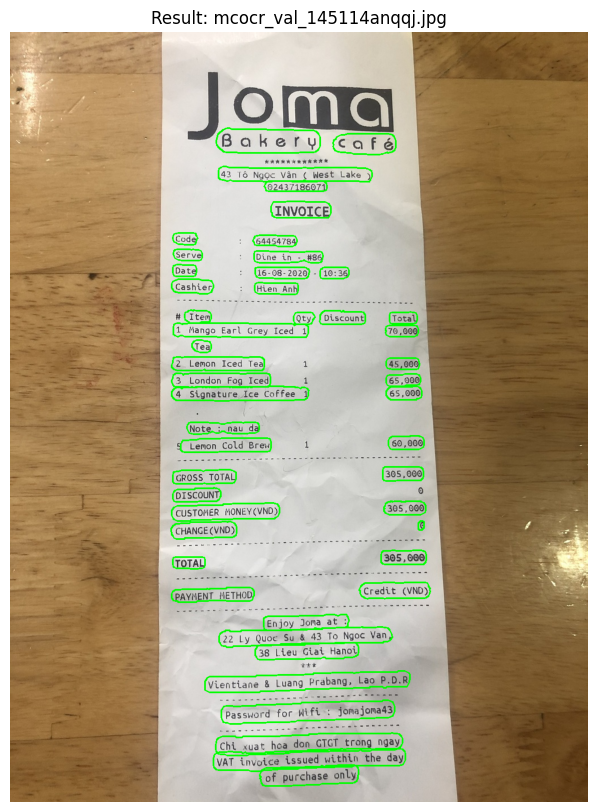

Processed mcocr_val_145114aszbc.jpg: Found 33 text regions.


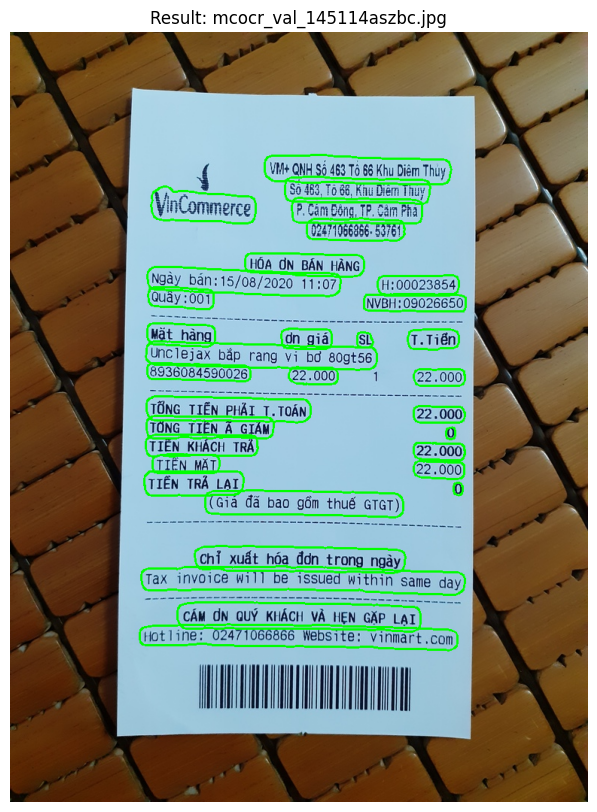

Processed mcocr_val_145114babwd.jpg: Found 54 text regions.


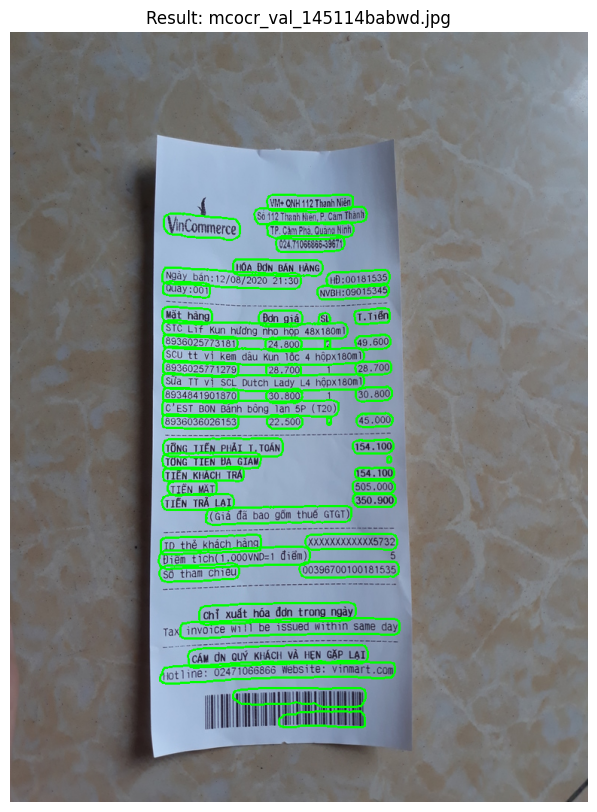

Processed mcocr_val_145114budzl.jpg: Found 47 text regions.


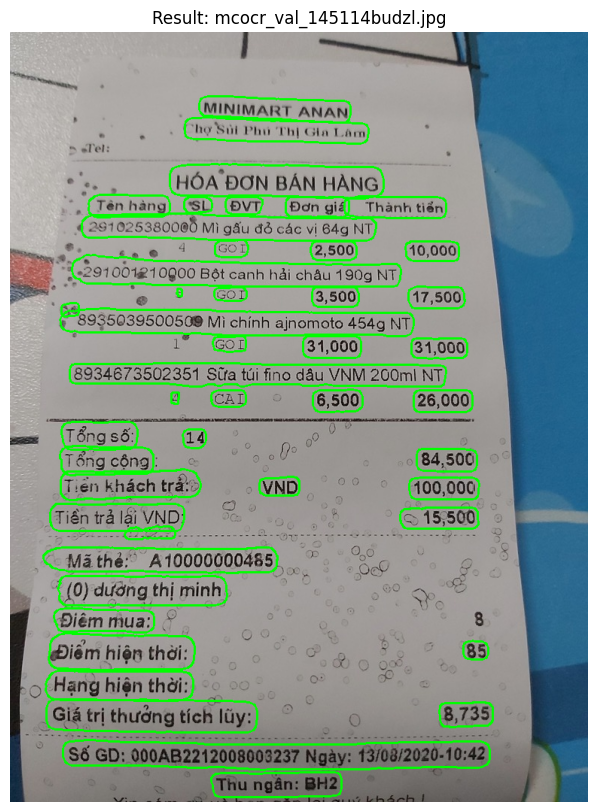

Processed mcocr_val_145115auaqs.jpg: Found 42 text regions.


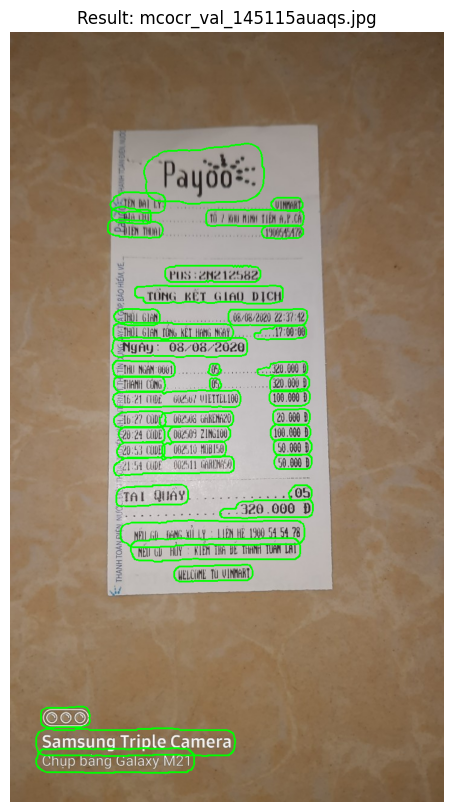

In [1]:
%run inference_detection.py